## K-Nearest Neighbor classification (KNN)



## Uppgift 0 - MNIST Data

-----

## A

-----

In [2]:
from tensorflow import keras
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).

    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.

    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
      from 0 to 255.

    

Efter att du har kört koden blir det följande: 

X_train.npy: Träningsbilderna.

y_train.npy: Etiketterna för träningsbilderna.

X_test.npy: Testbilderna.

y_test.npy: Etiketterna för testbilderna.

In [3]:
from tensorflow import keras
import numpy as np
import os


data_dir = 'Data'


# Ladda MNIST-datasetet
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Spara datan i mappen 'Data'
np.save(os.path.join(data_dir, 'X_train.npy'), X_train)
np.save(os.path.join(data_dir, 'y_train.npy'), y_train)
np.save(os.path.join(data_dir, 'X_test.npy'), X_test)
np.save(os.path.join(data_dir, 'y_test.npy'), y_test)

print(f"Datan har sparats i mappen '{data_dir}'.")

Datan har sparats i mappen 'Data'.


## B

------

### Förklaring av formen på MNIST-datasetet

#### **`X_train` och `X_test`**
- **Form**:  
  - `X_train`: `(60000, 28, 28)`  
  - `X_test`: `(10000, 28, 28)`  
- **Betydelse**:  
  - `X_train` innehåller **60000 bilder** och `X_test` innehåller **10000 bilder**.  
  - Varje bild är **28x28 pixlar**, vilket innebär att varje bild representeras som en 2D-matris med 28 rader och 28 kolumner.

#### **`y_train` och `y_test`**
- **Form**:  
  - `y_train`: `(60000,)`  
  - `y_test`: `(10000,)`  
- **Betydelse**:  
  - `y_train` innehåller **60000 etiketter** och `y_test` innehåller **10000 etiketter**.  
  - Varje etikett är en **siffra från 0 till 9** som representerar vilken siffra bilden visar.

### Sammanfattning
MNIST-datasetet består av **träningsdata** (`X_train`, `y_train`) och **testdata** (`X_test`, `y_test`). Träningsdatan används för att träna modellen, medan testdatan används för att utvärdera modellens prestanda. Varje bild är en **28x28 pixel** representation av en handskriven siffra, och varje etikett anger vilken siffra bilden visar.

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


## C

----

In [5]:
print(f"Antal bilder i X_train: {X_train.shape[0]}")

Antal bilder i X_train: 60000


## D

------
### Förklaring av koden

#### **`sample_image.min()` och `sample_image.max()`**
- **Syfte**:  
  Dessa funktioner returnerar det **minsta** och **största värdet** i bilden.  
- **Betydelse**:  
  Dessa värden representerar pixelintensiteten, där **0** vanligtvis är svart och **255** är vitt.

#### **`plt.imshow()`**
- **Syfte**:  
  Denna funktion visar bilden som en **28x28 pixel** gråskalebild.  
- **Parametrar**:  
  - `cmap='gray'`: Använder en gråskalefärgkarta för att representera bilden.

#### **`plt.colorbar()`**
- **Syfte**:  
  Lägger till en **färgskala** bredvid bilden för att visa pixelintensiteten.  
- **Betydelse**:  
  Färgskalan hjälper till att förstå hur pixelvärdena motsvarar ljushet/mörker i bilden.

### Resultat
- Du kommer att se det **minsta** och **största värdet** i bilden (vanligtvis **0** och **255**).  
- Bilden kommer att visas som en **28x28 pixel** gråskalebild, där **högre värden** representerar **mörkare pixlar**.

Minsta värde i bilden: 0
Största värde i bilden: 255


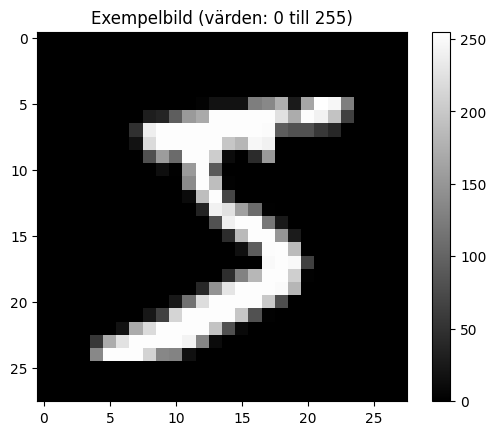

In [6]:
import matplotlib.pyplot as plt

# Välj en valfri bild (t.ex. den första bilden i X_train)
sample_image = X_train[0]

# Hitta det minsta och största värdet i bilden
min_value = sample_image.min()
max_value = sample_image.max()

print(f"Minsta värde i bilden: {min_value}")
print(f"Största värde i bilden: {max_value}")

# Plotta bilden
plt.imshow(sample_image, cmap='gray')
plt.title(f"Exempelbild (värden: {min_value} till {max_value})")
plt.colorbar()
plt.show()

## E

-----

### Förklaring av koden

#### **`np.random.choice()`**
- **Syfte**:  
  Väljer **20 slumpmässiga index** från `X_train` utan att välja samma bild flera gånger (`replace=False`).  
- **Betydelse**:  
  Säkerställer att varje bild i urvalet är unik.

#### **`plt.subplot()`**
- **Syfte**:  
  Skapar en **grid** med **4 rader** och **5 kolumner** för att visa de 20 bilderna.  
- **Betydelse**:  
  Organiserar bilderna i ett strukturerat format för bättre visning.

#### **`plt.imshow()`**
- **Syfte**:  
  Visar varje bild i **gråskala** (`cmap='gray'`).  
- **Betydelse**:  
  Gråskala är lämpligt för att representera MNIST-bilder, där högre pixelvärden motsvarar mörkare områden.

#### **`plt.title()`**
- **Syfte**:  
  Visar **etiketten** (siffran) för varje bild.  
- **Betydelse**:  
  Ger kontext till varje bild genom att visa vilken siffra den representerar.

#### **`plt.axis('off')`**
- **Syfte**:  
  Tar bort **axlar** för en renare visning.  
- **Betydelse**:  
  Förbättrar estetiken och fokuserar på bilderna istället för axlar.

### Resultat
Du kommer att se en **grid** med **20 slumpmässigt valda bilder** från `X_train`, där varje bild har sin korresponderande **etikett (siffra)** som titel.


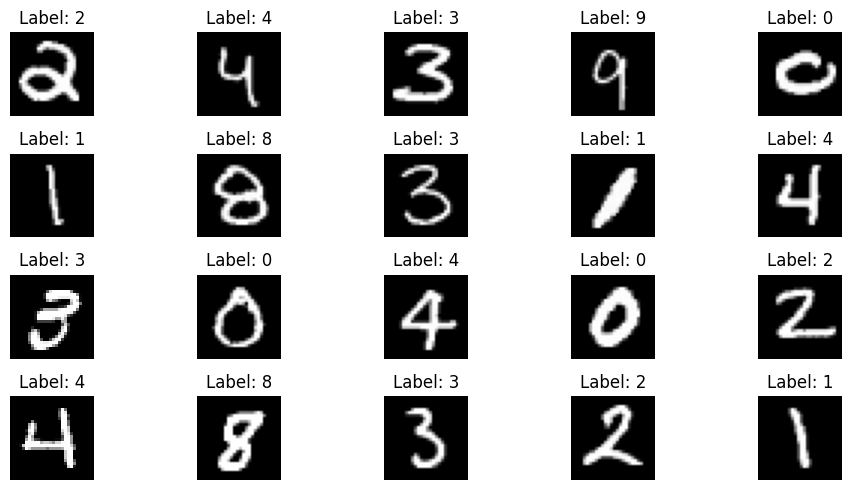

In [7]:


# Välj 20 slumpmässiga bilder från X_train
random_indices = np.random.choice(X_train.shape[0], 20, replace=False)
sample_images = X_train[random_indices]

# Skapa en figur för att visa bilderna
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)  # 4 rader, 5 kolumner
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Label: {y_train[random_indices[i]]}")
    plt.axis('off')  # Ta bort axlar för bättre visning

plt.tight_layout()
plt.show()

## F

-----

### Förklaring av koden

#### **`X_train.reshape(X_train.shape[0], -1)`**
- **Syfte**:  
  Omformar `X_train` från en **3D-tensor** till en **2D-matris**.  
- **Parametrar**:  
  - `X_train.shape[0]`: Behåller **antalet bilder** (60000).  
  - `-1`: Beräknar automatiskt **antalet kolumner** som behövs för att bevara alla pixlar (28 * 28 = 784).  
- **Betydelse**:  
  Varje bild som tidigare var en **28x28 matris** (784 pixlar) är nu en **rad** med **784 kolumner** i en 2D-matris.

#### **`X_test.reshape(X_test.shape[0], -1)`**
- **Syfte**:  
  Omformar `X_test` från en **3D-tensor** till en **2D-matris**.  
- **Parametrar**:  
  - Samma princip gäller som för `X_train`, men med **10000 bilder**.  
- **Betydelse**:  
  Varje bild i `X_test` blir också en **rad** med **784 kolumner** i en 2D-matris.

### Sammanfattning
Omformningen gör att datan är kompatibel med KNN-klassificeraren i scikit-learn, som kräver **2D-matriser** som indata.

In [8]:
# Omforma X_train och X_test till 2D-matriser
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Visa den nya formen
print(f"X_train omformad: {X_train_reshaped.shape}")
print(f"X_test omformad: {X_test_reshaped.shape}")

X_train omformad: (60000, 784)
X_test omformad: (10000, 784)


# Uppgift 1 - Train|test|validation split

### Steg-för-steg förklaring:

### Importerar `train_test_split`:
Vi använder `train_test_split` från `sklearn.model_selection` för att dela upp datan.

### Delar upp träningsdatan:
`X_train` och `y_train` delas upp i två delar:
- **Träningsset**: `X_train` och `y_train` (84% av den ursprungliga träningsdatan).
- **Valideringsset**: `X_val` och `y_val` (16% av den ursprungliga träningsdatan).

### Skriver ut storleken:
Vi skriver ut storleken på varje del för att se hur datan har delats upp:
- **Träningsset**: Storleken på det nya träningssetet.
- **Valideringsset**: Storleken på valideringssetet.
- **Testset**: Storleken på det ursprungliga testsetet (som inte ändras).


In [9]:
from sklearn.model_selection import train_test_split

# Dela upp träningsdatan i tränings- och valideringsset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16, random_state=42)

# Skriv ut storleken på varje del
print(f"Träningsset: {X_train.shape}, {y_train.shape}")
print(f"Valideringsset: {X_val.shape}, {y_val.shape}")
print(f"Testset: {X_test.shape}, {y_test.shape}")

Träningsset: (50400, 28, 28), (50400,)
Valideringsset: (9600, 28, 28), (9600,)
Testset: (10000, 28, 28), (10000,)


## Uppgift 2 - Hyperparameter tuning

In [10]:
# Vi behöver omforma datan från 3D till 2D genom att "platta ut" varje bild till en vektor.

# Omforma datan från 3D till 2D
X_train = X_train.reshape(X_train.shape[0], -1)  # (60000, 28, 28) -> (60000, 784)
X_val = X_val.reshape(X_val.shape[0], -1)        # (9600, 28, 28) -> (9600, 784)
X_test = X_test.reshape(X_test.shape[0], -1)    # (10000, 28, 28) -> (10000, 784)


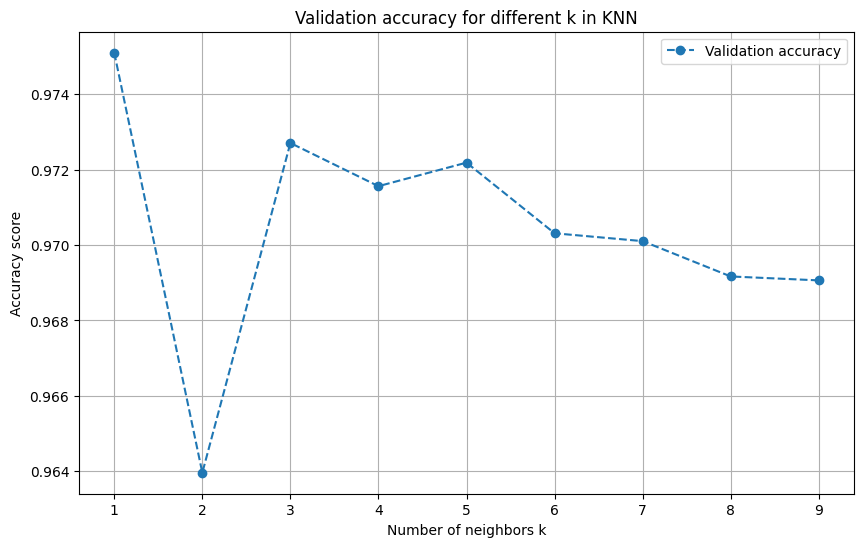

Bästa k-värdet: 1 med noggrannhet: 0.9751


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Lista med k-värden från 1 till 9
k_values = list(range(1, 10))  # [1, 2, 3, 4, 5, 6, 7, 8, 9]
accuracies = []

# Träna modeller och beräkna noggrannhet
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Rita grafen med samma stil som facit
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, '--o', label='Validation accuracy')
plt.xlabel('Number of neighbors k')
plt.ylabel('Accuracy score')
plt.title('Validation accuracy for different k in KNN')
plt.legend()
plt.grid(True)
plt.show()

# Hitta det bästa k-värdet
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Bästa k-värdet: {best_k} med noggrannhet: {max(accuracies):.4f}")

## Uppgift 3 - Train and predict

## A

In [12]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Träna modellen med bästa k-värdet (använd värdet vi hittade i uppgift 2)
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Gör förutsägelser på testdata
y_pred = best_knn.predict(X_test)

# Skapa klassificeringsrapport
print("Klassificeringsrapport:")
print(classification_report(y_test, y_pred))


Klassificeringsrapport:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.96      0.95       892
           6       0.98      0.98      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## B

Plottar en förvirringsmatris för att kontrollera resultatet i uppgift A

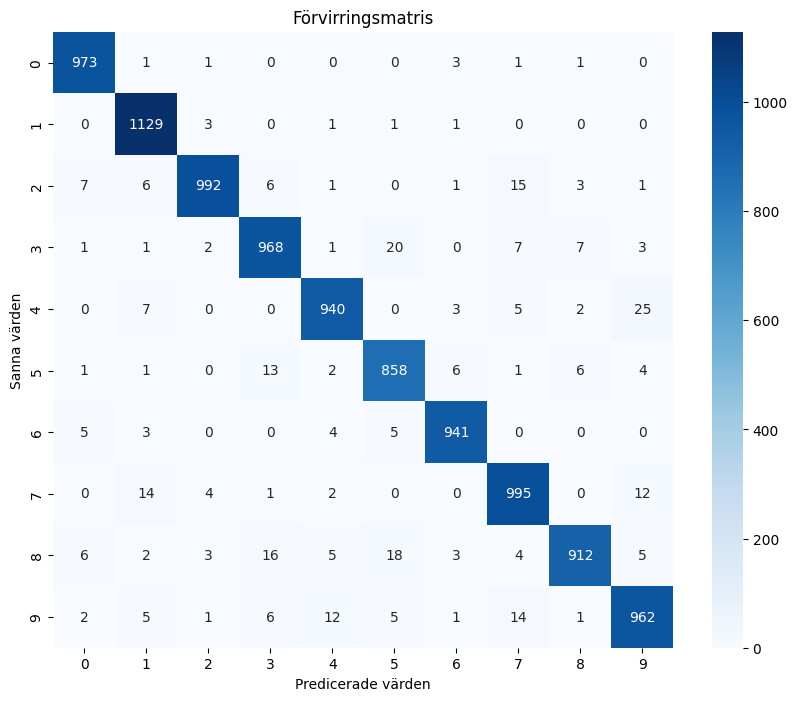

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Skapa förvirringsmatris
cm = confusion_matrix(y_test, y_pred)

# Plotta förvirringsmatrisen med seaborn för bättre visualisering
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Förvirringsmatris')
plt.xlabel('Predicerade värden')
plt.ylabel('Sanna värden')
plt.show()

## C 

Beräkna antalet felklassificeringar för varje siffra och analysera vilken siffra som hade flest fel:

## Analys av resultat

När vi har resultaten kan vi analysera varför vissa siffror är svårare att klassificera. Här är några möjliga anledningar:

- **Liknande former**: Siffror som 5 och 6 eller 3 och 8 kan vara svåra att skilja åt
- **Handstilvariationer**: Vissa siffror kan skrivas på många olika sätt
- **Obalanserad data**: Om vissa siffror är underrepresenterade i träningsdata kan modellen ha svårare att lära sig dem

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Skapa förvirringsmatris
cm = confusion_matrix(y_test, y_pred)

# Beräkna antal felklassificeringar per siffra
misclassifications = []
for digit in range(10):
    mask = y_test == digit
    incorrect = (y_pred[mask] != digit).sum()
    misclassifications.append(incorrect)
    print(f"Siffra {digit}: {incorrect} felklassificeringar")

# Visa vilken siffra som hade flest fel
worst_digit = np.argmax(misclassifications)
print(f"\nSiffran {worst_digit} hade flest felklassificeringar: {misclassifications[worst_digit]}")

Siffra 0: 7 felklassificeringar
Siffra 1: 6 felklassificeringar
Siffra 2: 40 felklassificeringar
Siffra 3: 42 felklassificeringar
Siffra 4: 42 felklassificeringar
Siffra 5: 34 felklassificeringar
Siffra 6: 17 felklassificeringar
Siffra 7: 33 felklassificeringar
Siffra 8: 62 felklassificeringar
Siffra 9: 47 felklassificeringar

Siffran 8 hade flest felklassificeringar: 62


## Uppgift 5 - Make an application for drawing handwritten numbers

In [19]:
import joblib
joblib.dump(best_knn, 'knn_model.pkl')

['knn_model.pkl']